# Market Research: Clustering analysis using K-means (PCA and t-SNE dimension reduction)

> * Evaluate optimal k number with Elbow method
* Build the model with kmeans
* Visualization 1: Apply PCA dimension reduction  + conclusions
* Visualization 2: Apply t-SNE dimension reduction + conclusions

### Install libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.fftpack as sp
import matplotlib.pyplot as plt
from collections import OrderedDict as OrderedDict
import json
import pandas_profiling

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectFromModel
import pandas_profiling
from sklearn.preprocessing import scale

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid

import xgboost as xgb
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import scikitplot as skplt

# t_NSE dimensionality reduction
from sklearn.manifold import TSNE

import warnings

warnings.simplefilter("ignore")

# display all columns
pd.set_option("display.max_columns", None)

from scipy.cluster import hierarchy as hc
from scipy import stats

## Load the file for analysis

In [2]:
# Importing the file and creating a dataframe
data_model = pd.read_csv(
    "file name", low_memory=False, skipinitialspace=True
)  # , sep='\t'

In [3]:
data_model.head()

,Unnamed: 0,area_responsibility_Company management,area_responsibility_Finance,area_responsibility_Human resources,area_responsibility_Information Technology,area_responsibility_Legal,area_responsibility_Manufacturing,area_responsibility_Marketing and communication,area_responsibility_Other,area_responsibility_Sales,area_responsibility_Strategy,area_responsibility_Supply chain,area_responsibility_Tax and accounting,ndustry_group_Agriculture and food,ndustry_group_Auto and manufacturing,ndustry_group_Banking_financial_insurance,ndustry_group_Consumer goods,ndustry_group_Education,ndustry_group_Energy_utilities,ndustry_group_Healthcare_pharma,ndustry_group_Info_tech_telco,ndustry_group_Others,Gender_Female,Gender_Male,Company size,Professional_experience,workload,job_situation,Satisfaction,respondent_ID_logstd,Q3a_dev_opp_logstd,Q3b_manager_logstd,Q3c_perso_contribution_logstd,Q3d_remuneration_logstd,Q3e_colleagues_logstd,Q3f_working_conditions_logstd,Q3g_align_comp_values_logstd,Q3h_sense_meaning_logstd,Q3i_job_freedom_logstd,Q3j_work_life_balance_logstd,Q3k_training_tools_logstd,Q3l_feel_challenged_logstd,Q5a_job_achievements_logstd,Q5b_feedback_logstd,Q5c_teamwork_logstd,Q5d_opportunities_growth_logstd,Q5e_work_life_balance_logstd,Q5f_customer focus_logstd,Q5g_purpose_direction_logstd,Q5h_fairness_logstd,Q5i_respect_for_management_logstd,Q5j_comp_ben_logstd,Q5k_workplace_logstd,Q5l_communication_logstd,Q5m_performance_logstd,Q5n_diversity_logstd,Q5o_respect_for_employees_logstd
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,3,3,2,2,4.615814,-0.327198,0.108528,0.930459,-0.040687,0.222855,0.512250,-1.064467,-0.036605,-0.244088,-0.902278,-0.534205,-0.687065,0.848267,-0.066752,-2.721796,0.560728,-0.468870,0.869257,0.823915,-0.777973,-1.558809,0.985903,0.895972,-0.368523,1.131725,-0.370190,-0.152787
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,3,2,3,2,0,4.536723,0.958618,0.629394,-2.493131,-2.416771,0.821714,-2.774410,0.528577,-0.882524,-1.178912,-2.339714,0.262541,1.121287,0.733049,0.905184,0.595272,-0.852763,-1.742182,-0.177475,0.309696,0.219703,-0.331304,-0.410480,0.633699,1.050988,0.641999,0.867049,-1.317610
2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,4,2,1,2,4.228228,-1.613014,1.033409,0.930459,0.581514,0.821714,1.041284,-0.132596,0.563584,0.419179,-0.902278,0.827841,0.680901,-1.669756,-0.066752,-0.403265,1.217965,0.926557,-1.115846,-1.115560,1.025181,0.119449,-0.410480,0.633699,0.829298,0.641999,-0.645343,0.594430
3,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,2,1,2,1,4.091265,-0.327198,0.629394,0.455789,-0.917629,0.821714,0.512250,-1.064467,-0.036605,-0.244088,0.535158,0.262541,-0.687065,-0.468354,-0.334068,-0.403265,0.039051,-1.742182,1.062985,0.922907,0.540882,0.298334,-1.291500,-1.235486,0.570499,0.905773,0.078395,1.156104
4,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,3,3,2,1,4.086886,0.424956,-0.625592,-0.156167,0.581514,-0.549207,-1.131080,0.528577,0.563584,0.419179,-2.339714,0.262541,0.680901,-1.669756,-0.642662,-1.723259,-0.195527,-0.135441,0.031212,0.595614,0.540882,1.140447,0.985903,0.485658,-1.442342,0.905773,0.867049,0.444699


In [4]:
# remove the Unnamed column and respondent_ID
data_model.drop("Unnamed: 0", axis=1, inplace=True)
data_model.drop("respondent_ID_logstd", axis=1, inplace=True)
data_model.shape

(404, 55)

### Evaluate the K number with Elbow method

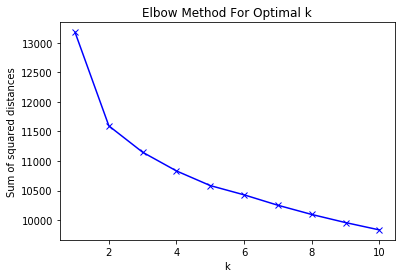

In [5]:
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, init="k-means++", random_state=123)
    km = km.fit(data_model)
    ss_dist.append(km.inertia_)

plt.plot(K, ss_dist, "bx-")
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method For Optimal k")
plt.show()

* **Conclusion**: We will take k = 5

## Build the cluster model with KMeans

In [6]:
# Initialize our model
kmeans = KMeans(n_clusters=5)

In [7]:
# Fit our model
kmeans.fit(data_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# Find which cluster each data-point belongs to
clusters = kmeans.predict(data_model)

In [9]:
# Add the cluster vector to our DataFrame, X
data_model["Cluster"] = clusters

In [10]:
data_model.head()

,area_responsibility_Company management,area_responsibility_Finance,area_responsibility_Human resources,area_responsibility_Information Technology,area_responsibility_Legal,area_responsibility_Manufacturing,area_responsibility_Marketing and communication,area_responsibility_Other,area_responsibility_Sales,area_responsibility_Strategy,area_responsibility_Supply chain,area_responsibility_Tax and accounting,ndustry_group_Agriculture and food,ndustry_group_Auto and manufacturing,ndustry_group_Banking_financial_insurance,ndustry_group_Consumer goods,ndustry_group_Education,ndustry_group_Energy_utilities,ndustry_group_Healthcare_pharma,ndustry_group_Info_tech_telco,ndustry_group_Others,Gender_Female,Gender_Male,Company size,Professional_experience,workload,job_situation,Satisfaction,Q3a_dev_opp_logstd,Q3b_manager_logstd,Q3c_perso_contribution_logstd,Q3d_remuneration_logstd,Q3e_colleagues_logstd,Q3f_working_conditions_logstd,Q3g_align_comp_values_logstd,Q3h_sense_meaning_logstd,Q3i_job_freedom_logstd,Q3j_work_life_balance_logstd,Q3k_training_tools_logstd,Q3l_feel_challenged_logstd,Q5a_job_achievements_logstd,Q5b_feedback_logstd,Q5c_teamwork_logstd,Q5d_opportunities_growth_logstd,Q5e_work_life_balance_logstd,Q5f_customer focus_logstd,Q5g_purpose_direction_logstd,Q5h_fairness_logstd,Q5i_respect_for_management_logstd,Q5j_comp_ben_logstd,Q5k_workplace_logstd,Q5l_communication_logstd,Q5m_performance_logstd,Q5n_diversity_logstd,Q5o_respect_for_employees_logstd,Cluster
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,3,3,2,2,-0.327198,0.108528,0.930459,-0.040687,0.222855,0.512250,-1.064467,-0.036605,-0.244088,-0.902278,-0.534205,-0.687065,0.848267,-0.066752,-2.721796,0.560728,-0.468870,0.869257,0.823915,-0.777973,-1.558809,0.985903,0.895972,-0.368523,1.131725,-0.370190,-0.152787,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,3,2,3,2,0,0.958618,0.629394,-2.493131,-2.416771,0.821714,-2.774410,0.528577,-0.882524,-1.178912,-2.339714,0.262541,1.121287,0.733049,0.905184,0.595272,-0.852763,-1.742182,-0.177475,0.309696,0.219703,-0.331304,-0.410480,0.633699,1.050988,0.641999,0.867049,-1.317610,2
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,4,2,1,2,-1.613014,1.033409,0.930459,0.581514,0.821714,1.041284,-0.132596,0.563584,0.419179,-0.902278,0.827841,0.680901,-1.669756,-0.066752,-0.403265,1.217965,0.926557,-1.115846,-1.115560,1.025181,0.119449,-0.410480,0.633699,0.829298,0.641999,-0.645343,0.594430,4
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,2,1,2,1,-0.327198,0.629394,0.455789,-0.917629,0.821714,0.512250,-1.064467,-0.036605,-0.244088,0.535158,0.262541,-0.687065,-0.468354,-0.334068,-0.403265,0.039051,-1.742182,1.062985,0.922907,0.540882,0.298334,-1.291500,-1.235486,0.570499,0.905773,0.078395,1.156104,2
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,3,3,2,1,0.424956,-0.625592,-0.156167,0.581514,-0.549207,-1.131080,0.528577,0.563584,0.419179,-2.339714,0.262541,0.680901,-1.669756,-0.642662,-1.723259,-0.195527,-0.135441,0.031212,0.595614,0.540882,1.140447,0.985903,0.485658,-1.442342,0.905773,0.867049,0.444699,3


In [11]:
data_model.Cluster.value_counts()

4    133
2     85
3     67
0     60
1     59
Name: Cluster, dtype: int64

## Visualization 1: Apply PCA to visualize the clusters

In [12]:
# Create X/y arrays
features = data_model.drop("Cluster", axis=1)
X = features.values
y = data_model.Cluster.values

print("X:", X.shape)  # (178, 13)
print("y:", y.shape)  # (178,)

X: (404, 55)
y: (404,)


In [45]:
# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_rescaled = scaler.fit_transform(X)

# Create PCA transformer
pca = PCA(n_components=2)

# Apply PCA
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
print(
    "Cumulative explained variation for 2 principal components: {}".format(
        np.sum(pca.explained_variance_ratio_)
    )
)

Cumulative explained variation for 2 principal components: 0.23520077719179516


In [46]:
# Project data onto the first two components
X_2d = pca.transform(X)

In [47]:
X_2d.shape

(404, 2)

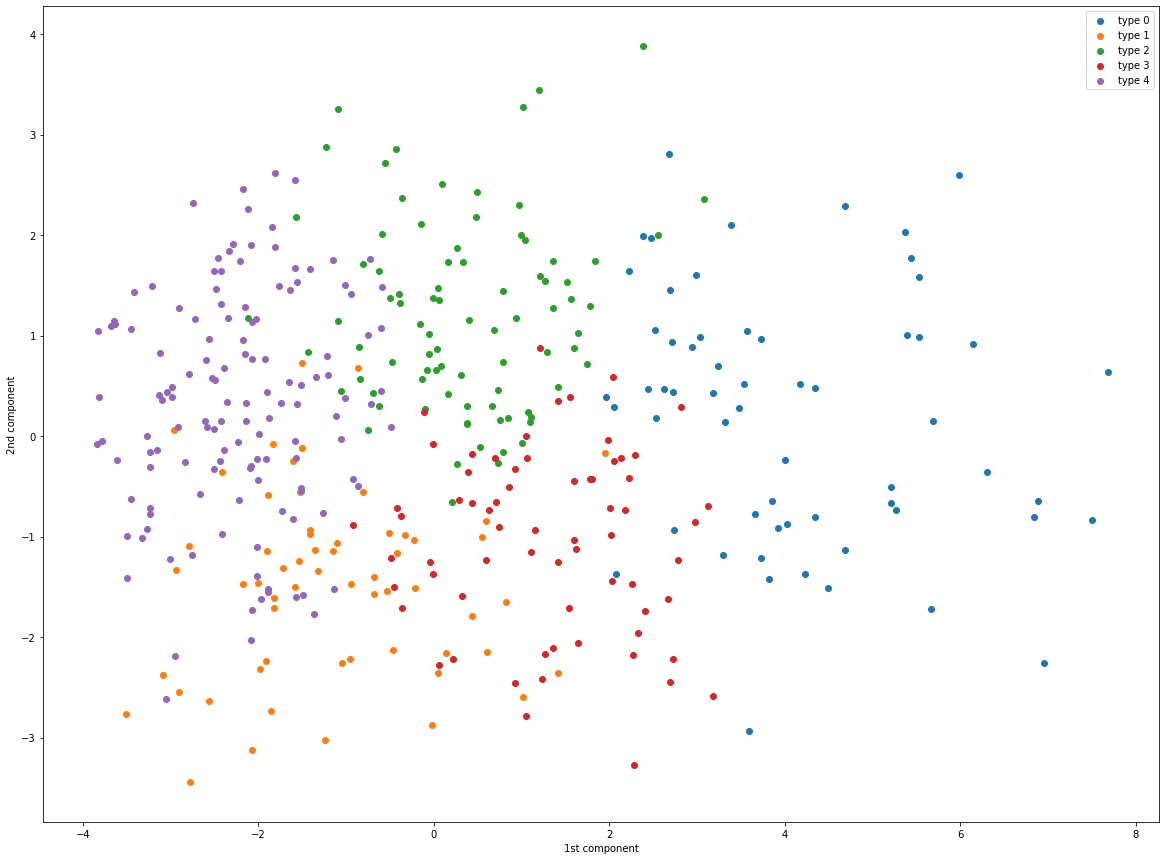

In [16]:
# Plot each cluster
plt.figure(figsize=(20, 15))

for Cluster in [0, 1, 2, 3, 4]:
    # Cluster of this type
    idx = y == Cluster

    # Plot their components
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label="type {}".format(Cluster))

# Labels and legend
plt.legend()
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

### Conclusions about PCA reduction
>* Clusters are not so well differentiated
* It could be explained by the fact that PCA dimension reduction to 2 parameters explains 23.5% of the variance only
* We would prefer the t-SNE dimension reduction for visualization

## Visualization 2: Use t-SNE to visualize clusters

>* We will tune the perplexity to evaluate the impact of the cluster differentiation

### Perplexity = 100

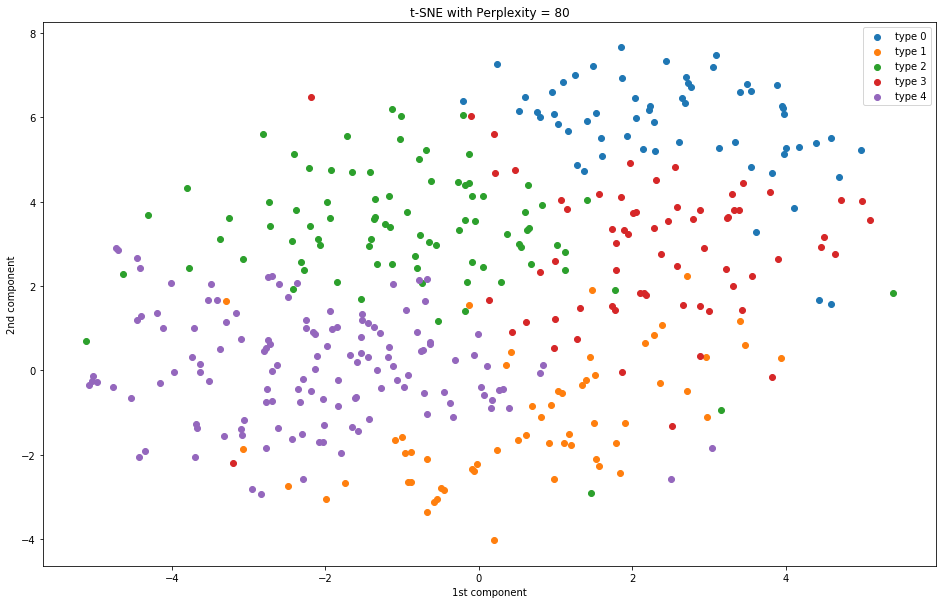

In [66]:
# Value of the perplexity hyper-parameter
perplexity1 = 80

# T-SNE with two dimensions
tsne_2da = TSNE(n_components=2, perplexity=perplexity1)

# Fit and transform X with t-SNE function
TCs_2da = tsne_2da.fit_transform(X)

# Plot each cluster
plt.figure(figsize=(16, 10))

for Cluster in [0, 1, 2, 3, 4]:
    # Cluster of this type
    idx = y == Cluster

    # Plot their components
    plt.scatter(TCs_2da[idx, 0], TCs_2da[idx, 1], label="type {}".format(Cluster))

# Labels and legend
plt.legend()
plt.title("t-SNE with Perplexity = 80")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

### Perplexity = 50

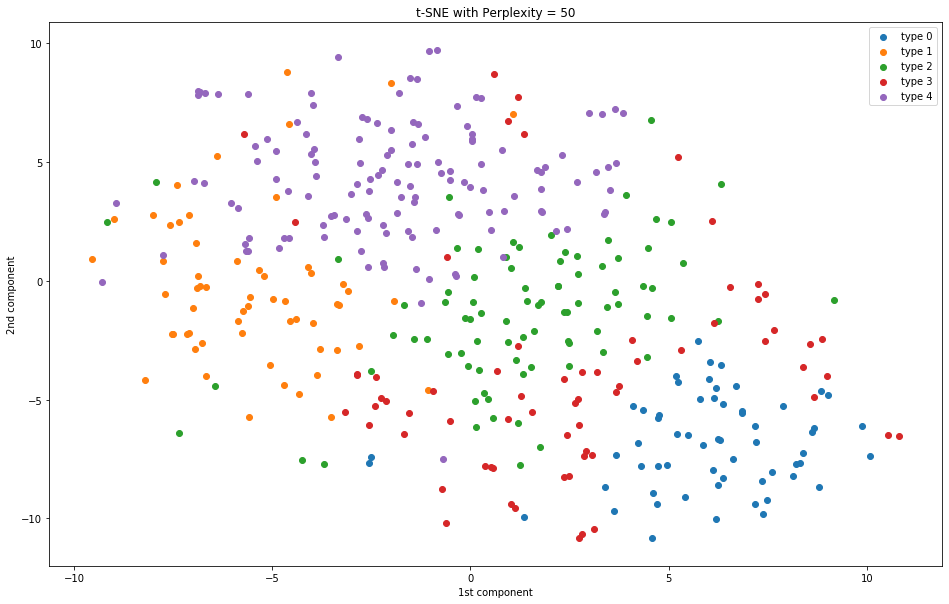

In [60]:
# Value of the perplexity hyper-parameter
perplexity1 = 50

# T-SNE with two dimensions
tsne_2da = TSNE(n_components=2, perplexity=perplexity1)

# Fit and transform X with t-SNE function
TCs_2da = tsne_2da.fit_transform(X)

# Plot each cluster
plt.figure(figsize=(16, 10))

for Cluster in [0, 1, 2, 3, 4]:
    # Cluster of this type
    idx = y == Cluster

    # Plot their components
    plt.scatter(TCs_2da[idx, 0], TCs_2da[idx, 1], label="type {}".format(Cluster))

# Labels and legend
plt.legend()
plt.title("t-SNE with Perplexity = 50")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

### Perplexity = 10

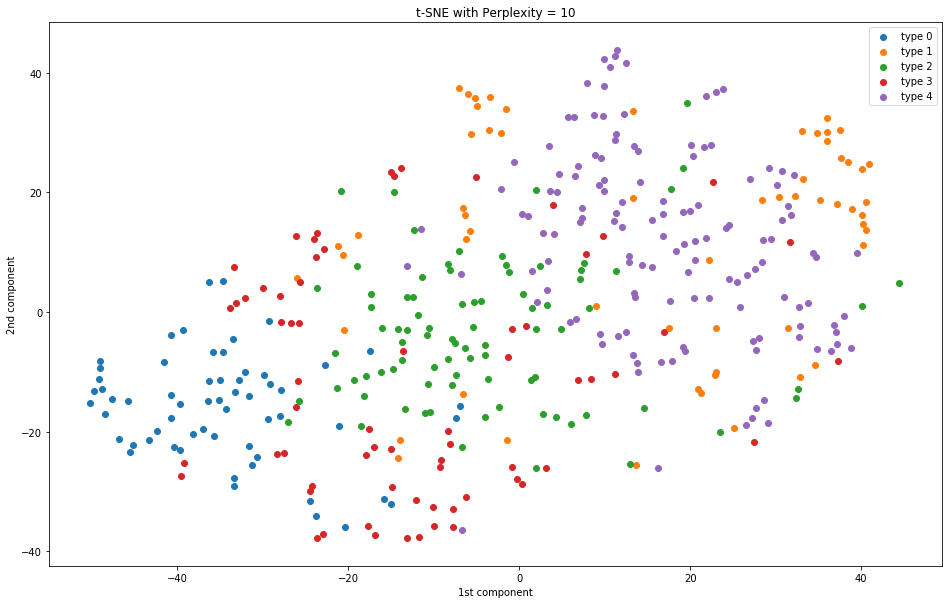

In [62]:
# Value of the perplexity hyper-parameter
perplexity1 = 10

# T-SNE with two dimensions
tsne_2da = TSNE(n_components=2, perplexity=perplexity1)

# Fit and transform X with t-SNE function
TCs_2da = tsne_2da.fit_transform(X)

# Plot each cluster
plt.figure(figsize=(16, 10))

for Cluster in [0, 1, 2, 3, 4]:
    # Cluster of this type
    idx = y == Cluster

    # Plot their components
    plt.scatter(TCs_2da[idx, 0], TCs_2da[idx, 1], label="type {}".format(Cluster))

# Labels and legend
plt.legend()
plt.title("t-SNE with Perplexity = 10")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

### Conclusions about t-SNE dimension reduction
>* Clusters are well differentiated with Perplexity = 100

## Add cluster classification, PCA 2 components coordinates to the original data file for visualization of cluster characteristics

In [23]:
# Import the file issued during the EDA process and creating a dataframe
df_for_cluster = pd.read_csv(
    "C:/Users/fbaff/Documents/Data Science/Finder Research 2019/Python Notebooks/df_for_cluster.csv",
    low_memory=False,
    skipinitialspace=True,
)  # , sep='\t'

In [24]:
df_for_cluster.head()

,Unnamed: 0,respondent_ID,channel,area_responsibility,industry,ndustry_group,Nb employees,Company size,Gender,Professional_experience,Satisfaction,job_situation,Q3a_dev_opp,Q3b_manager,Q3c_perso_contribution,Q3d_remuneration,Q3e_colleagues,Q3f_working_conditions,Q3g_align_comp_values,Q3h_sense_meaning,Q3i_job_freedom,Q3j_work_life_balance,Q3k_training_tools,Q3l_feel_challenged,workload,Q5a_job_achievements,Q5b_feedback,Q5c_teamwork,Q5d_opportunities_growth,Q5e_work_life_balance,Q5f_customer focus,Q5g_purpose_direction,Q5h_fairness,Q5i_respect_for_management,Q5j_comp_ben,Q5k_workplace,Q5l_communication,Q5m_performance,Q5n_diversity,Q5o_respect_for_employees
0,0,10882908921,Lausanne,Marketing and communication,Banking,Banking_financial_insurance,100 to 149,1 to 149,Female,16 to 20 years,Satisfied,Active,2.0,3.0,5.0,3.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,Too heavy,10.0,8.0,1.0,9.0,3.0,13.0,11.0,4.0,2.0,12.0,14.0,6.0,15.0,7.0,5.0
1,1,10879775971,Lausanne,Tax and accounting,Pharmaceutical,Healthcare_pharma,1000,>1000,Female,11 to 15 years,Not satisfied,Active,4.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,2.0,1.0,3.0,5.0,Too heavy,9.0,13.0,10.0,3.0,1.0,6.0,7.0,8.0,5.0,4.0,12.0,15.0,11.0,14.0,2.0
2,3,10867564537,Lausanne,Human resources,Pharmaceutical,Healthcare_pharma,150 to 299,150 to 999,Male,+20 years,Satisfied,Planning,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0,2.0,4.0,4.0,Good,1.0,8.0,5.0,15.0,10.0,3.0,2.0,14.0,7.0,4.0,12.0,13.0,11.0,6.0,9.0
3,4,10862147414,Lausanne,Human resources,Health care,Healthcare_pharma,1000,>1000,Male,11 to 15 years,OK,Active,2.0,4.0,4.0,2.0,5.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,Too light,3.0,7.0,5.0,6.0,1.0,15.0,12.0,10.0,8.0,2.0,4.0,11.0,13.0,9.0,14.0
4,5,10861974271,Geneva,Sales,Hospitality,Others,100 to 149,1 to 149,Female,16 to 20 years,OK,Active,3.0,2.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3.0,4.0,Too heavy,1.0,6.0,2.0,5.0,4.0,7.0,9.0,10.0,15.0,12.0,11.0,3.0,13.0,14.0,8.0


In [25]:
# select the integer columns
df_clust_num = df_for_cluster.select_dtypes(include=[np.int64, np.float64])

In [26]:
# remove the Unnamed column and respondent_ID
# df_clust_num.drop('Unnamed: 0', axis=1, inplace=True)
# df_clust_num.drop('respondent_ID', axis=1, inplace=True)
df_clust_num.shape

(404, 29)

In [27]:
df_clust_num.head()

,Unnamed: 0,respondent_ID,Q3a_dev_opp,Q3b_manager,Q3c_perso_contribution,Q3d_remuneration,Q3e_colleagues,Q3f_working_conditions,Q3g_align_comp_values,Q3h_sense_meaning,Q3i_job_freedom,Q3j_work_life_balance,Q3k_training_tools,Q3l_feel_challenged,Q5a_job_achievements,Q5b_feedback,Q5c_teamwork,Q5d_opportunities_growth,Q5e_work_life_balance,Q5f_customer focus,Q5g_purpose_direction,Q5h_fairness,Q5i_respect_for_management,Q5j_comp_ben,Q5k_workplace,Q5l_communication,Q5m_performance,Q5n_diversity,Q5o_respect_for_employees
0,0,10882908921,2.0,3.0,5.0,3.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,10.0,8.0,1.0,9.0,3.0,13.0,11.0,4.0,2.0,12.0,14.0,6.0,15.0,7.0,5.0
1,1,10879775971,4.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,2.0,1.0,3.0,5.0,9.0,13.0,10.0,3.0,1.0,6.0,7.0,8.0,5.0,4.0,12.0,15.0,11.0,14.0,2.0
2,3,10867564537,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0,2.0,4.0,4.0,1.0,8.0,5.0,15.0,10.0,3.0,2.0,14.0,7.0,4.0,12.0,13.0,11.0,6.0,9.0
3,4,10862147414,2.0,4.0,4.0,2.0,5.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,7.0,5.0,6.0,1.0,15.0,12.0,10.0,8.0,2.0,4.0,11.0,13.0,9.0,14.0
4,5,10861974271,3.0,2.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3.0,4.0,1.0,6.0,2.0,5.0,4.0,7.0,9.0,10.0,15.0,12.0,11.0,3.0,13.0,14.0,8.0


### Select from data_model only variables relevant for the analysis which are not numerical

In [28]:
# Create a new dataframe
df_clust_feat = data_model[
    [
        "Gender_Female",
        "Gender_Male",
        "Company size",
        "Professional_experience",
        "workload",
        "job_situation",
        "Satisfaction",
        "Cluster",
    ]
]

In [29]:
df_clust_feat.head()

,Gender_Female,Gender_Male,Company size,Professional_experience,workload,job_situation,Satisfaction,Cluster
0,1,0,1,3,3,2,2,1
1,1,0,3,2,3,2,0,2
2,0,1,2,4,2,1,2,4
3,0,1,3,2,1,2,1,2
4,1,0,1,3,3,2,1,3


In [30]:
# Merge df_clust_num and df_clust_feat
data_cluster_analysis = pd.merge(
    df_clust_num, df_clust_feat, right_index=True, left_index=True
)

In [31]:
data_cluster_analysis.head()

,Unnamed: 0,respondent_ID,Q3a_dev_opp,Q3b_manager,Q3c_perso_contribution,Q3d_remuneration,Q3e_colleagues,Q3f_working_conditions,Q3g_align_comp_values,Q3h_sense_meaning,Q3i_job_freedom,Q3j_work_life_balance,Q3k_training_tools,Q3l_feel_challenged,Q5a_job_achievements,Q5b_feedback,Q5c_teamwork,Q5d_opportunities_growth,Q5e_work_life_balance,Q5f_customer focus,Q5g_purpose_direction,Q5h_fairness,Q5i_respect_for_management,Q5j_comp_ben,Q5k_workplace,Q5l_communication,Q5m_performance,Q5n_diversity,Q5o_respect_for_employees,Gender_Female,Gender_Male,Company size,Professional_experience,workload,job_situation,Satisfaction,Cluster
0,0,10882908921,2.0,3.0,5.0,3.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,10.0,8.0,1.0,9.0,3.0,13.0,11.0,4.0,2.0,12.0,14.0,6.0,15.0,7.0,5.0,1,0,1,3,3,2,2,1
1,1,10879775971,4.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,2.0,1.0,3.0,5.0,9.0,13.0,10.0,3.0,1.0,6.0,7.0,8.0,5.0,4.0,12.0,15.0,11.0,14.0,2.0,1,0,3,2,3,2,0,2
2,3,10867564537,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0,2.0,4.0,4.0,1.0,8.0,5.0,15.0,10.0,3.0,2.0,14.0,7.0,4.0,12.0,13.0,11.0,6.0,9.0,0,1,2,4,2,1,2,4
3,4,10862147414,2.0,4.0,4.0,2.0,5.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,7.0,5.0,6.0,1.0,15.0,12.0,10.0,8.0,2.0,4.0,11.0,13.0,9.0,14.0,0,1,3,2,1,2,1,2
4,5,10861974271,3.0,2.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3.0,4.0,1.0,6.0,2.0,5.0,4.0,7.0,9.0,10.0,15.0,12.0,11.0,3.0,13.0,14.0,8.0,1,0,1,3,3,2,1,3


In [32]:
data_cluster_analysis.Cluster.value_counts()

4    133
2     85
3     67
0     60
1     59
Name: Cluster, dtype: int64

In [33]:
data_cluster_analysis.job_situation.value_counts()

2    220
1    105
0     79
Name: job_situation, dtype: int64

In [34]:
# Save the data_cluster_analysis file as csv
# data_cluster_analysis.to_csv('cluster_analysis_num.csv')

## Add cluster categories to the original data_model file (no variable transformation)

In [35]:
# Importing the file and creating a dataframe
master_modeling = pd.read_csv(
    "flie name",
    low_memory=False,
    skipinitialspace=True,
)  # , sep='\t'

In [36]:
# Select the cluster categories from the df-clust_feat dataframe
df_clust_cat = data_model[["Cluster"]]

In [37]:
# Add cluster categories to the orginal dataframe not transformed
data_cluster_analysis2 = pd.merge(
    df_clust_cat, master_modeling, right_index=True, left_index=True
)

In [38]:
data_cluster_analysis2.head()

,Cluster,Unnamed: 0,respondent_ID,channel,area_responsibility,industry,ndustry_group,Nb employees,Company size,Gender,Professional_experience,Satisfaction,job_situation,Q3a_dev_opp,Q3b_manager,Q3c_perso_contribution,Q3d_remuneration,Q3e_colleagues,Q3f_working_conditions,Q3g_align_comp_values,Q3h_sense_meaning,Q3i_job_freedom,Q3j_work_life_balance,Q3k_training_tools,Q3l_feel_challenged,workload,Q5a_job_achievements,Q5b_feedback,Q5c_teamwork,Q5d_opportunities_growth,Q5e_work_life_balance,Q5f_customer focus,Q5g_purpose_direction,Q5h_fairness,Q5i_respect_for_management,Q5j_comp_ben,Q5k_workplace,Q5l_communication,Q5m_performance,Q5n_diversity,Q5o_respect_for_employees
0,1,0,10882908921,Lausanne,Marketing and communication,Banking,Banking_financial_insurance,100 to 149,1 to 149,Female,16 to 20 years,Satisfied,Active,2.0,3.0,5.0,3.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,Too heavy,10.0,8.0,1.0,9.0,3.0,13.0,11.0,4.0,2.0,12.0,14.0,6.0,15.0,7.0,5.0
1,2,1,10879775971,Lausanne,Tax and accounting,Pharmaceutical,Healthcare_pharma,1000,>1000,Female,11 to 15 years,Not satisfied,Active,4.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,2.0,1.0,3.0,5.0,Too heavy,9.0,13.0,10.0,3.0,1.0,6.0,7.0,8.0,5.0,4.0,12.0,15.0,11.0,14.0,2.0
2,4,3,10867564537,Lausanne,Human resources,Pharmaceutical,Healthcare_pharma,150 to 299,150 to 999,Male,+20 years,Satisfied,Planning,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0,2.0,4.0,4.0,Good,1.0,8.0,5.0,15.0,10.0,3.0,2.0,14.0,7.0,4.0,12.0,13.0,11.0,6.0,9.0
3,2,4,10862147414,Lausanne,Human resources,Health care,Healthcare_pharma,1000,>1000,Male,11 to 15 years,OK,Active,2.0,4.0,4.0,2.0,5.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,Too light,3.0,7.0,5.0,6.0,1.0,15.0,12.0,10.0,8.0,2.0,4.0,11.0,13.0,9.0,14.0
4,3,5,10861974271,Geneva,Sales,Hospitality,Others,100 to 149,1 to 149,Female,16 to 20 years,OK,Active,3.0,2.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3.0,4.0,Too heavy,1.0,6.0,2.0,5.0,4.0,7.0,9.0,10.0,15.0,12.0,11.0,3.0,13.0,14.0,8.0


In [39]:
# drop not relevant variables
data_cluster_analysis2.drop("channel", axis=1, inplace=True)
data_cluster_analysis2.drop("ndustry_group", axis=1, inplace=True)
data_cluster_analysis2.drop("Nb employees", axis=1, inplace=True)
data_cluster_analysis2.drop("Unnamed: 0", axis=1, inplace=True)

In [40]:
data_cluster_analysis2.head()

,Cluster,respondent_ID,area_responsibility,industry,Company size,Gender,Professional_experience,Satisfaction,job_situation,Q3a_dev_opp,Q3b_manager,Q3c_perso_contribution,Q3d_remuneration,Q3e_colleagues,Q3f_working_conditions,Q3g_align_comp_values,Q3h_sense_meaning,Q3i_job_freedom,Q3j_work_life_balance,Q3k_training_tools,Q3l_feel_challenged,workload,Q5a_job_achievements,Q5b_feedback,Q5c_teamwork,Q5d_opportunities_growth,Q5e_work_life_balance,Q5f_customer focus,Q5g_purpose_direction,Q5h_fairness,Q5i_respect_for_management,Q5j_comp_ben,Q5k_workplace,Q5l_communication,Q5m_performance,Q5n_diversity,Q5o_respect_for_employees
0,1,10882908921,Marketing and communication,Banking,1 to 149,Female,16 to 20 years,Satisfied,Active,2.0,3.0,5.0,3.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,Too heavy,10.0,8.0,1.0,9.0,3.0,13.0,11.0,4.0,2.0,12.0,14.0,6.0,15.0,7.0,5.0
1,2,10879775971,Tax and accounting,Pharmaceutical,>1000,Female,11 to 15 years,Not satisfied,Active,4.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,2.0,1.0,3.0,5.0,Too heavy,9.0,13.0,10.0,3.0,1.0,6.0,7.0,8.0,5.0,4.0,12.0,15.0,11.0,14.0,2.0
2,4,10867564537,Human resources,Pharmaceutical,150 to 999,Male,+20 years,Satisfied,Planning,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0,2.0,4.0,4.0,Good,1.0,8.0,5.0,15.0,10.0,3.0,2.0,14.0,7.0,4.0,12.0,13.0,11.0,6.0,9.0
3,2,10862147414,Human resources,Health care,>1000,Male,11 to 15 years,OK,Active,2.0,4.0,4.0,2.0,5.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,Too light,3.0,7.0,5.0,6.0,1.0,15.0,12.0,10.0,8.0,2.0,4.0,11.0,13.0,9.0,14.0
4,3,10861974271,Sales,Hospitality,1 to 149,Female,16 to 20 years,OK,Active,3.0,2.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3.0,4.0,Too heavy,1.0,6.0,2.0,5.0,4.0,7.0,9.0,10.0,15.0,12.0,11.0,3.0,13.0,14.0,8.0


In [41]:
data_cluster_analysis2.Cluster.value_counts()

4    133
2     85
3     67
0     60
1     59
Name: Cluster, dtype: int64

In [42]:
data_cluster_analysis2.job_situation.value_counts()

Active      220
Planning    105
Stay         79
Name: job_situation, dtype: int64

In [43]:
# Save the data_cluster_analysis2 file as csv
# data_cluster_analysis2.to_csv('cluster_analysis_text.csv')